# Travelling Salesman Problem (TSP)

**The provided code below uses simulated annealing to solve the Traveling Salesman Problem (TSP). Let's break down the key components and the approach used in the code:**

### TravellingSalesmanProblem Class (Annealer):

- Inherits from the Annealer class provided by the `simanneal` library.
- The `__init__` method initializes the TSP instance with the initial state (city order) and the distance matrix.
- The `move` method defines the transformation applied to the state, which involves swapping two randomly chosen cities.
- The `energy` method calculates the total distance of the current state (route).

### distance Function:

- Calculates the distance between two latitude-longitude coordinates using the Haversine formula.

### update Method:

- A custom method in the `TravellingSalesmanProblem` class.
- Updates the temperature list at each iteration. This list is later used for plotting temperature variations.

### Cities and Initial State:

- A dictionary `cities` contains the names and coordinates of cities.
- `init_state` is a randomly shuffled initial order of cities.

### Distance Matrix:

- A 2D dictionary `distance_matrix` stores the distances between each pair of cities.

### Initialization and Annealing:

- The `TravellingSalesmanProblem` class is instantiated with the initial state and distance matrix.
- The annealing schedule is set using the `set_schedule` method, with an automatic schedule for a duration of 0.2 minutes.
- The annealing process is executed using the `anneal` method.

### Result Presentation:

- The optimal route and total distance are printed.
- The time elapsed during the annealing process is calculated and printed.

### Temperature Variations Plot:

- The temperatures at each iteration are plotted using Matplotlib.

### Optimal Path Plotting:

- The `plot_optimal_path` function (not provided) presumably plots the optimal path on a map.

### Execution:

- The entire process is executed when the script is run (`if __name__ == '__main__':`).
- The choice of temperature schedule (`tsp.auto(minutes=0.2)`) and other parameters affect the annealing process. The temperature is gradually decreased, controlling the exploration-exploitation trade-off. The temperature variations are plotted to visualize the annealing process. The overall goal is to find an optimal route that minimizes the total distance traveled.


 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     4.90000       5617.98     4.80%     0.00%     0:00:02     0:00:00 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     4.90000       5020.09     4.45%     0.18%     0:00:05     0:00:00


Optimal Route:
Total Distance: 4918 miles
Cities in Order:
New Delhi ➞  Kanpur ➞  Lucknow ➞  Patna ➞  Kolkata ➞  Bhubaneshwar ➞  Visakhapatnam ➞  Hyderabad ➞  Chennai ➞  Bangalore ➞  Thiruvananthapuram ➞  Kochi ➞  Kozhikode ➞  Panaji ➞  Pune ➞  Mumbai ➞  Vadodara ➞  Ahmedabad ➞  Indore ➞  Nagpur ➞  Bhopal ➞  Jaipur ➞  Ludhiana
Time Elapsed: 7.59 seconds


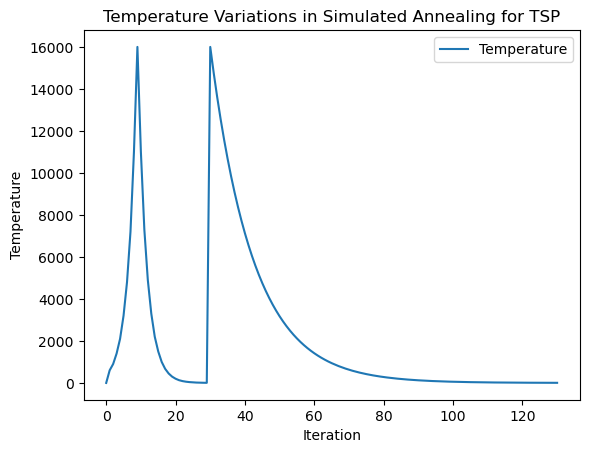

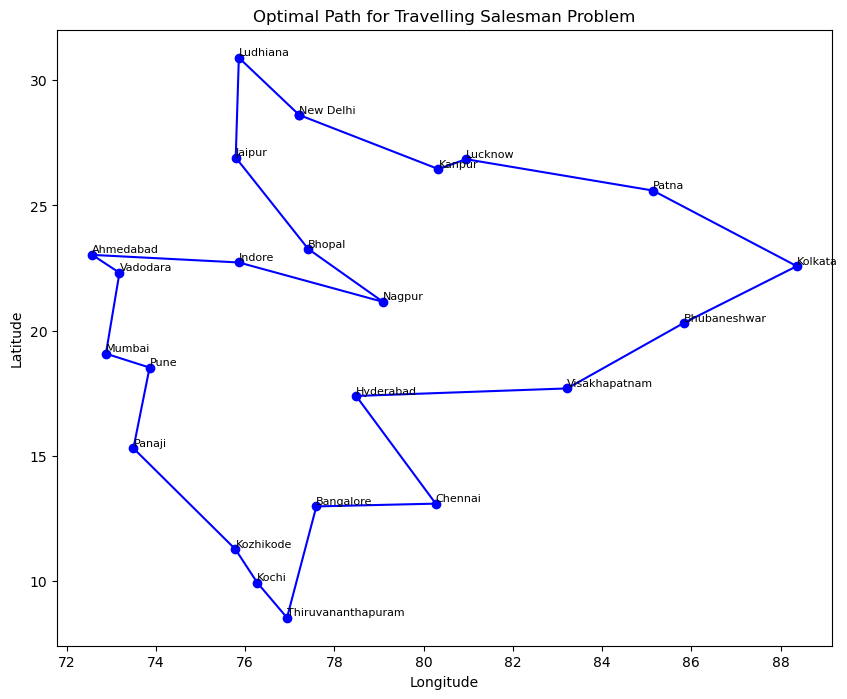

In [6]:
from __future__ import print_function
import math
import random
from collections import defaultdict
from simanneal import Annealer
import time
import matplotlib.pyplot as plt

# Function to calculate distance between two latitude-longitude coordinates
def distance(a, b):
    R = 3963  # radius of Earth (miles)
    lat1, lon1 = math.radians(a[0]), math.radians(a[1])
    lat2, lon2 = math.radians(b[0]), math.radians(b[1])
    return math.acos(math.sin(lat1) * math.sin(lat2) +
                     math.cos(lat1) * math.cos(lat2) * math.cos(lon1 - lon2)) * R


def plot_optimal_path(cities, optimal_path):
    # Extract coordinates for the optimal path
    optimal_path_coordinates = [cities[city] for city in optimal_path]

    # Split the coordinates into latitude and longitude
    latitudes, longitudes = zip(*optimal_path_coordinates)

    # Add the starting city at the end to close the loop
    latitudes += (latitudes[0],)
    longitudes += (longitudes[0],)

    # Plot the path on a map
    plt.figure(figsize=(10, 8))
    plt.plot(longitudes, latitudes, marker='o', linestyle='-', color='b')
    plt.title('Optimal Path for Travelling Salesman Problem')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')

    # Annotate each city on the plot
    for city, (lat, lon) in cities.items():
        plt.text(lon, lat, city, fontsize=8, ha='left', va='bottom')

    plt.show()

# Travelling Salesman Problem Class
class TravellingSalesmanProblem(Annealer):
    """Test annealer with a travelling salesman problem."""

    def __init__(self, state, distance_matrix):
        # Initialize the TSP instance with the initial state and distance matrix
        self.distance_matrix = distance_matrix
        self.temperature_list = []  # List to store temperatures
        super(TravellingSalesmanProblem, self).__init__(state)

    def move(self):
        """Swaps two cities in the route."""
        # Move method: Swaps two randomly chosen cities in the route
        initial_energy = self.energy()

        a = random.randint(0, len(self.state) - 1)
        b = random.randint(0, len(self.state) - 1)
        self.state[a], self.state[b] = self.state[b], self.state[a]

        return self.energy() - initial_energy

    def energy(self):
        """Calculates the length of the route."""
        # Energy method: Calculates the total length of the route
        e = 0
        for i in range(len(self.state)):
            e += self.distance_matrix[self.state[i - 1]][self.state[i]]
        return e

    def update(self, step, T, E, acceptance, improvement):
        """Update temperature list at each iteration."""
        # Update method: Update temperature list at each iteration
        self.temperature_list.append(T)
        super(TravellingSalesmanProblem, self).update(step, T, E, acceptance, improvement)

# Main Execution Block
if __name__ == '__main__':
    # Dictionary with city coordinates
    cities = {  
        'New Delhi': (28.6139, 77.2090),
        'Mumbai': (19.0760, 72.8777),
        'Bangalore': (12.9716, 77.5946),
        'Chennai': (13.0827, 80.2707),
        'Kolkata': (22.5726, 88.3639),
        'Hyderabad': (17.3850, 78.4867),
        'Pune': (18.5204, 73.8567),
        'Ahmedabad': (23.0225, 72.5714),
        'Jaipur': (26.9124, 75.7873),
        'Lucknow': (26.8467, 80.9462),
        'Kanpur': (26.4499, 80.3319),
        'Nagpur': (21.1458, 79.0882),
        'Indore': (22.7196, 75.8577),
        'Panaji': (15.2956, 73.4940),
        'Bhopal': (23.2599, 77.4126),
        'Visakhapatnam': (17.6868, 83.2185),
        'Bhubaneshwar': (20.296059, 85.824539),
        'Patna': (25.5941, 85.1376),
        'Vadodara': (22.3072, 73.1812),
        'Ludhiana': (30.9010, 75.8573),
        'Thiruvananthapuram': (8.5241, 76.9366),
        'Kochi': (9.9312, 76.2673),
        'Kozhikode': (11.2588, 75.7804)
    }

    # Randomly shuffle the initial state
    init_state = list(cities)
    random.shuffle(init_state)

    # Create a distance matrix
    distance_matrix = defaultdict(dict)
    for ka, va in cities.items():
        for kb, vb in cities.items():
            distance_matrix[ka][kb] = 0.0 if kb == ka else distance(va, vb)

    # Measure the start time
    start_time = time.time()

    # Initialize the TSP problem
    tsp = TravellingSalesmanProblem(init_state, distance_matrix)

    # Set the annealing schedule
    tsp.set_schedule(tsp.auto(minutes=0.2))
    tsp.copy_strategy = "slice"

    # Execute the simulated annealing process
    state, e = tsp.anneal()

    # Measure the end time
    end_time = time.time()
    elapsed_time = end_time - start_time

    # Rotate the optimal route to start with 'New Delhi'
    while state[0] != 'New Delhi':
        state = state[1:] + state[:1]

    # Print the results
    print("\nOptimal Route:")
    print("Total Distance: %i miles" % e)
    print("Cities in Order:")
    print(" ➞  ".join(state))
    print("Time Elapsed: %.2f seconds" % elapsed_time)

    # Plot temperature variations during the annealing process
    plt.plot(tsp.temperature_list, label='Temperature')
    plt.xlabel('Iteration')
    plt.ylabel('Temperature')
    plt.title('Temperature Variations in Simulated Annealing for TSP')
    plt.legend()
    plt.show()

    # Assuming plot_optimal_path is defined elsewhere, call the function to plot the optimal path on a map
    plot_optimal_path(cities, state)
